In [1]:
import os
import scipy
import numpy as np
import pandas as pd
import math
import sys
import multivelo as mv
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import requests
# from dtw import *

In [2]:
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)

In [3]:

rna_url = "https://figshare.com/ndownloader/files/40064275"
atac_url = "https://figshare.com/ndownloader/files/40064278"

rna_path = "data/datasets/hair_adata_rna_postpro.h5ad"
atac_path = "data/datasets/hair_adata_atac_postpro.h5ad"

In [51]:
adata_rna = sc.read(rna_path, backup_url=rna_url)
# adata_atac = sc.read(atac_path, backup_url=atac_url)

In [198]:
adata_rna.X = adata_rna

AnnData object with n_obs × n_vars = 6436 × 962
    layers: 'Mc'
    obsp: 'connectivities'

In [147]:
adata_rna.obs

,celltype,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,initial_size_spliced,initial_size_unspliced,initial_size,n_counts
atac.bc,,,,,,,,,
"R1.01,R2.06,R3.83,P1.07",TAC-1,331,529.0,0.0,0.0,529,702,529.0,319.837402
"R1.01,R2.11,R3.86,P1.08",TAC-1,531,745.0,0.0,0.0,745,979,745.0,348.535522
"R1.01,R2.15,R3.09,P1.07",TAC-1,251,464.0,0.0,0.0,464,732,464.0,259.254272
"R1.01,R2.17,R3.81,P1.05",TAC-1,263,438.0,0.0,0.0,438,667,438.0,309.253387
"R1.01,R2.18,R3.95,P1.06",TAC-1,297,820.0,0.0,0.0,820,1000,820.0,202.756104
...,...,...,...,...,...,...,...,...,...
"R1.96,R2.73,R3.72,P1.08",Hair Shaft-cuticle.cortex,58,132.0,0.0,0.0,132,208,132.0,196.340897
"R1.96,R2.82,R3.52,P1.07",Hair Shaft-cuticle.cortex,233,349.0,0.0,0.0,349,1107,349.0,337.676239
"R1.96,R2.83,R3.68,P1.06",Hair Shaft-cuticle.cortex,247,738.0,0.0,0.0,738,784,738.0,168.963394


In [178]:
adata_rna.layers["matrix"].shape

(6436, 962)

In [5]:

adata_result = mv.recover_dynamics_chrom(adata_rna,
                                        adata_atac,
                                        max_iter=5,
                                        init_mode="invert",
                                        verbose=False,
                                        parallel=True,
                                        n_jobs = 15,
                                        save_plot=False,
                                        rna_only=False,
                                        fit=True,
                                        n_anchors=500,
                                        extra_color_key='celltype'
                                        )                                        

  0%|          | 0/962 [00:00<?, ?it/s]

In [6]:
mv.set_velocity_genes(adata_result, likelihood_lower=0.02)
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

computing velocity graph (using 1/20 cores)


  0%|          | 0/6436 [00:00<?, ?cells/s]

    finished (0:00:34) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 5 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:01) --> added
    'velo_s_norm_umap', embedded velocity vectors (adata.obsm)


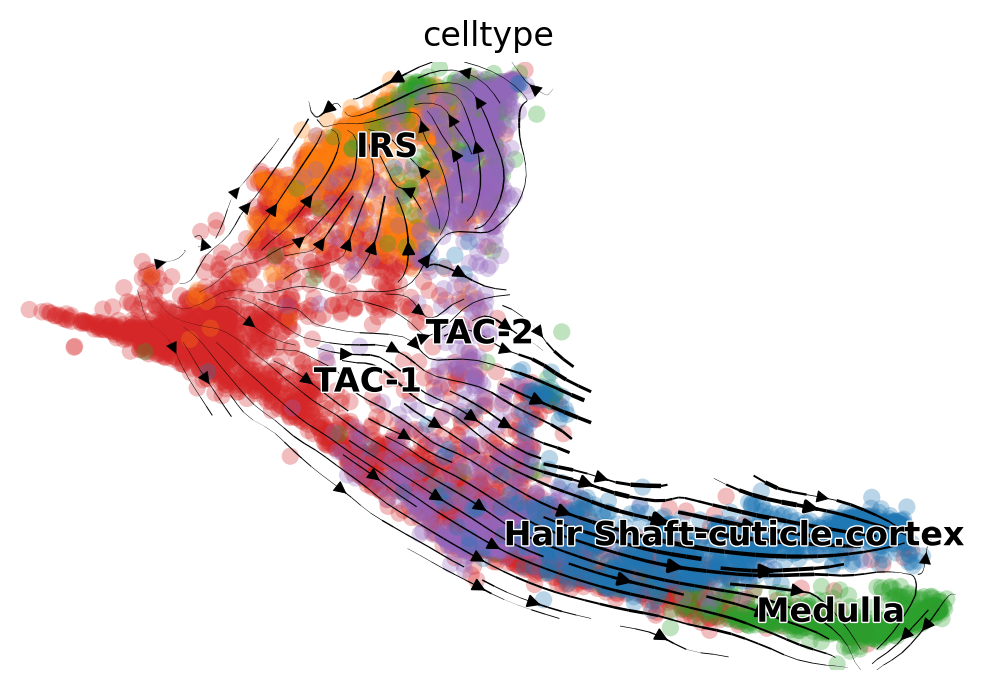

In [7]:
mv.velocity_embedding_stream(adata_result, basis='umap', color='celltype', show=True)

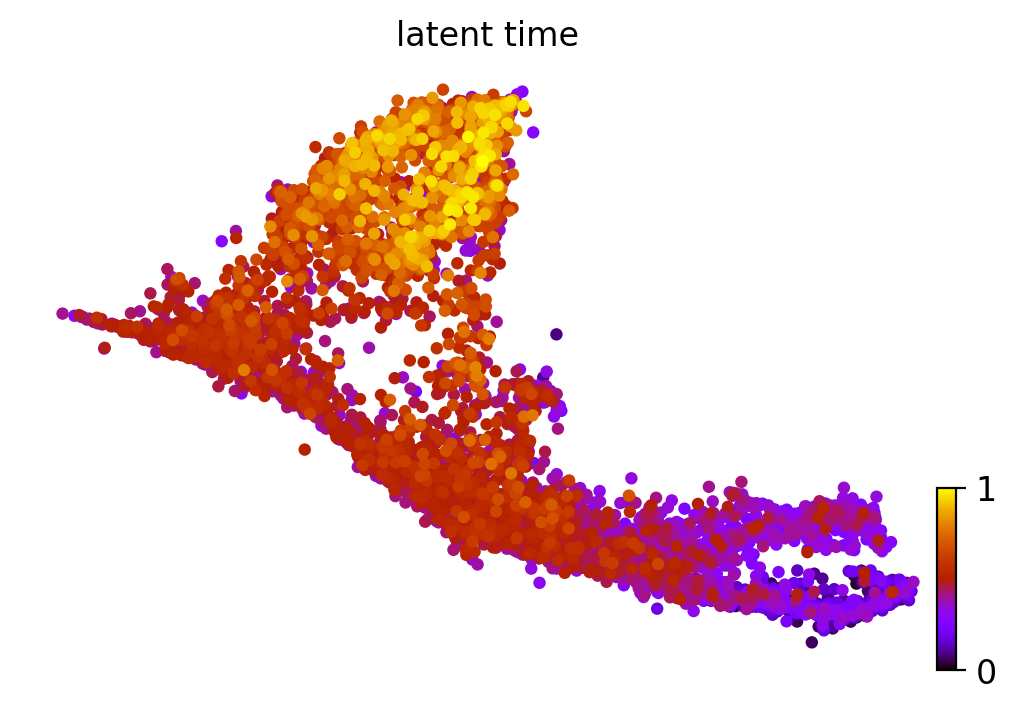

In [8]:
scv.pl.scatter(adata_result, color='latent_time', color_map='gnuplot', size=80)


In [5]:
h5ad_url = "https://figshare.com/ndownloader/files/40064263"
adata_result = sc.read("data/datasets/multivelo_result_fig4.h5ad", backup_url = h5ad_url)

In [6]:
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

computing velocity graph (using 1/20 cores)


  0%|          | 0/6436 [00:00<?, ?cells/s]

    finished (0:00:19) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:01) --> added
    'velo_s_norm_umap', embedded velocity vectors (adata.obsm)


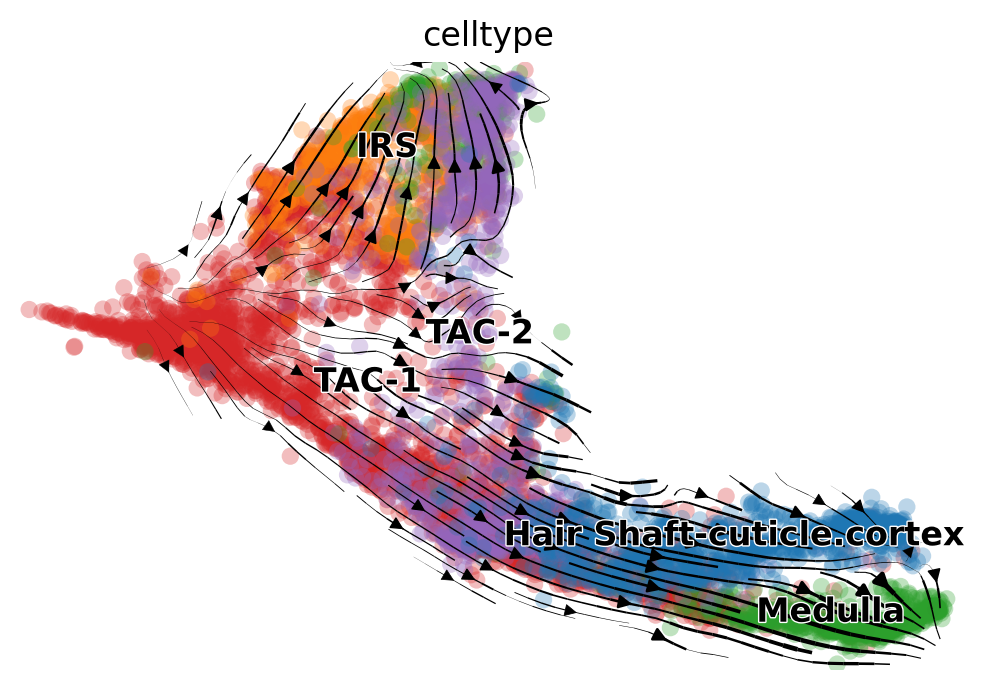

In [7]:
mv.velocity_embedding_stream(adata_result, basis='umap', color='celltype', show=True)

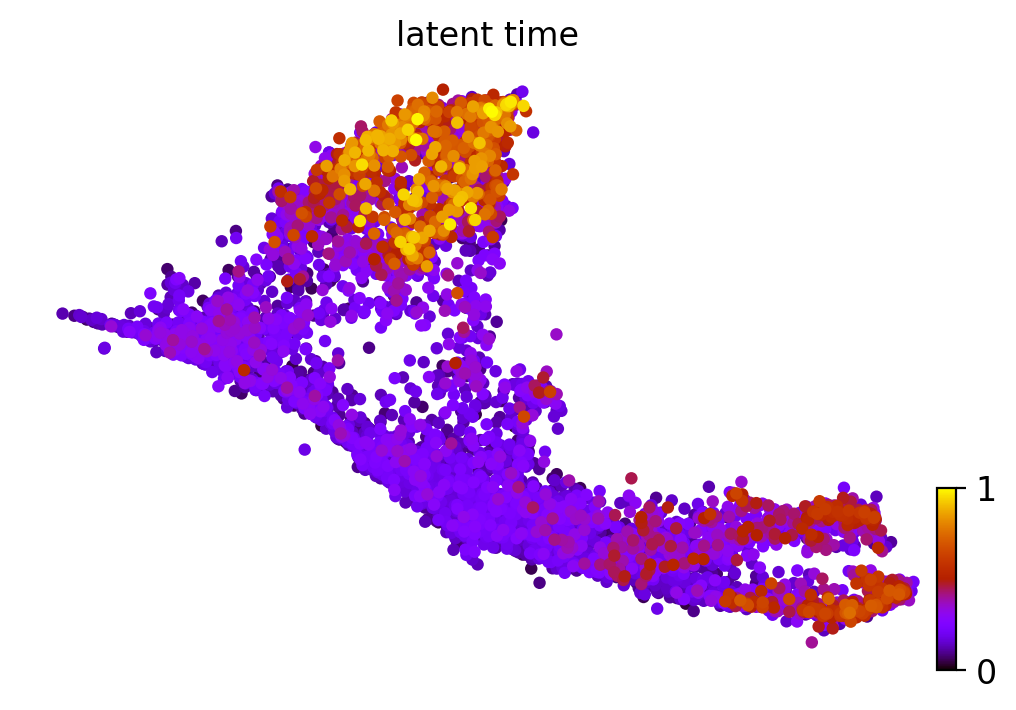

In [8]:
scv.pl.scatter(adata_result, color='latent_time', color_map='gnuplot', size=80)

In [9]:
adata_result.write("Multivelo/result_hair.h5ad")

In [10]:
adata_rna.obs["latent_time" ] = adata_result.obs["latent_time"]

In [11]:
adata_rna.obs

,celltype,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,latent_time
atac.bc,,,,,,,,,,
"R1.01,R2.06,R3.83,P1.07",TAC-1,331,529.0,0.0,0.0,529,702,529.0,319.837402,0.366586
"R1.01,R2.11,R3.86,P1.08",TAC-1,531,745.0,0.0,0.0,745,979,745.0,348.535522,0.387718
"R1.01,R2.15,R3.09,P1.07",TAC-1,251,464.0,0.0,0.0,464,732,464.0,259.254272,0.147633
"R1.01,R2.17,R3.81,P1.05",TAC-1,263,438.0,0.0,0.0,438,667,438.0,309.253387,0.356577
"R1.01,R2.18,R3.95,P1.06",TAC-1,297,820.0,0.0,0.0,820,1000,820.0,202.756104,0.131708
...,...,...,...,...,...,...,...,...,...,...
"R1.96,R2.73,R3.72,P1.08",Hair Shaft-cuticle.cortex,58,132.0,0.0,0.0,132,208,132.0,196.340897,0.345225
"R1.96,R2.82,R3.52,P1.07",Hair Shaft-cuticle.cortex,233,349.0,0.0,0.0,349,1107,349.0,337.676239,0.313259
"R1.96,R2.83,R3.68,P1.06",Hair Shaft-cuticle.cortex,247,738.0,0.0,0.0,738,784,738.0,168.963394,0.343906


In [52]:
import anndata as ad
rna_adata = ad.AnnData(adata_rna.layers["matrix"])
rna_adata.obs = adata_rna.obs
rna_adata.var = adata_rna.var

In [54]:
rna_adata.obs["latent_time" ] = adata_result.obs["latent_time"]

## Wrap up the rna and dna data to multi-modal adata

## Read the atac data row countt


In [ ]:
rna_adata = ad.AnnData(adata_rna.layers["matrix"])

In [12]:
from scipy.sparse import coo_matrix
data =np.genfromtxt("/mnt/data0/halo/skin/skin_counts.txt", skip_header=1)
rows = data[:, 0].astype(int)
cols = data[:, 1].astype(int)
vals = data[:, 2]

# Create the COO sparse matrix
sparse_mat = coo_matrix((vals, (rows, cols)))


In [13]:
sparse_mat = sparse_mat.tocsr().T
sparse_mat = sparse_mat[1:, 1:]
sparse_mat.shape

(34774, 344592)

In [14]:
import anndata as ad

atac_data = ad.AnnData(sparse_mat)

In [15]:
celltypes =  pd.read_csv("/mnt/data0/halo/skin/skin_celltype.txt.gz", delimiter='\t')
celltypes

,atac.bc,rna.bc,celltype
0,R1.01.R2.01.R3.06.P1.07,R1.01.R2.01.R3.06.P1.55,Dermal Fibroblast
1,R1.01.R2.03.R3.68.P1.07,R1.01.R2.03.R3.68.P1.55,Dermal Fibroblast
2,R1.01.R2.05.R3.15.P1.05,R1.01.R2.05.R3.15.P1.53,Dermal Fibroblast
3,R1.01.R2.05.R3.40.P1.07,R1.01.R2.05.R3.40.P1.55,Dermal Fibroblast
4,R1.01.R2.05.R3.49.P1.07,R1.01.R2.05.R3.49.P1.55,Dermal Fibroblast
...,...,...,...
34769,R1.92.R2.79.R3.05.P1.08,R1.92.R2.79.R3.05.P1.56,Melanocyte
34770,R1.93.R2.20.R3.18.P1.05,R1.93.R2.20.R3.18.P1.53,Melanocyte
34771,R1.93.R2.80.R3.62.P1.07,R1.93.R2.80.R3.62.P1.55,Melanocyte
34772,R1.93.R2.91.R3.82.P1.08,R1.93.R2.91.R3.82.P1.56,Melanocyte


In [16]:
atac_var = pd.read_csv("/mnt/data0/halo/skin/skin_peaks.bed.gz", delimiter="\t", header=None)
atac_var

,0,1,2
0,chrX,143482906,143483206
1,chr6,3200976,3201276
2,chr9,123461850,123462150
3,chr1,56782095,56782395
4,chr9,56223668,56223968
...,...,...,...
344587,chr10,107887768,107888068
344588,chr10,107038880,107039180
344589,chr10,10549625,10549925
344590,chr10,105270865,105271165


In [17]:
### change the barcode
def change_barcodes(row):
    abc = row["atac.bc"]
    # print(abc)
    abc = list(abc)
    ## check points
    if abc[5] == '.':
        abc[5]=','
    if abc[11] == ".":
        abc[11] = ','
    if abc[17]=='.':
        abc[17]=','
    return "".join(abc)            

In [18]:
celltypes["atac.bc"] = celltypes.apply(lambda row: change_barcodes(row), axis=1)
celltypes

,atac.bc,rna.bc,celltype
0,"R1.01,R2.01,R3.06,P1.07",R1.01.R2.01.R3.06.P1.55,Dermal Fibroblast
1,"R1.01,R2.03,R3.68,P1.07",R1.01.R2.03.R3.68.P1.55,Dermal Fibroblast
2,"R1.01,R2.05,R3.15,P1.05",R1.01.R2.05.R3.15.P1.53,Dermal Fibroblast
3,"R1.01,R2.05,R3.40,P1.07",R1.01.R2.05.R3.40.P1.55,Dermal Fibroblast
4,"R1.01,R2.05,R3.49,P1.07",R1.01.R2.05.R3.49.P1.55,Dermal Fibroblast
...,...,...,...
34769,"R1.92,R2.79,R3.05,P1.08",R1.92.R2.79.R3.05.P1.56,Melanocyte
34770,"R1.93,R2.20,R3.18,P1.05",R1.93.R2.20.R3.18.P1.53,Melanocyte
34771,"R1.93,R2.80,R3.62,P1.07",R1.93.R2.80.R3.62.P1.55,Melanocyte
34772,"R1.93,R2.91,R3.82,P1.08",R1.93.R2.91.R3.82.P1.56,Melanocyte


In [20]:
atac_data.obs = celltypes.set_index("atac.bc")
atac_data.obs

,rna.bc,celltype
atac.bc,,
"R1.01,R2.01,R3.06,P1.07",R1.01.R2.01.R3.06.P1.55,Dermal Fibroblast
"R1.01,R2.03,R3.68,P1.07",R1.01.R2.03.R3.68.P1.55,Dermal Fibroblast
"R1.01,R2.05,R3.15,P1.05",R1.01.R2.05.R3.15.P1.53,Dermal Fibroblast
"R1.01,R2.05,R3.40,P1.07",R1.01.R2.05.R3.40.P1.55,Dermal Fibroblast
"R1.01,R2.05,R3.49,P1.07",R1.01.R2.05.R3.49.P1.55,Dermal Fibroblast
...,...,...
"R1.92,R2.79,R3.05,P1.08",R1.92.R2.79.R3.05.P1.56,Melanocyte
"R1.93,R2.20,R3.18,P1.05",R1.93.R2.20.R3.18.P1.53,Melanocyte
"R1.93,R2.80,R3.62,P1.07",R1.93.R2.80.R3.62.P1.55,Melanocyte


In [21]:
atac_data = atac_data[adata_rna.obs.index, :]
atac_data

View of AnnData object with n_obs × n_vars = 6436 × 344592
    obs: 'rna.bc', 'celltype'

In [62]:
atac_data.var = atac_var
atac_data.var["feature_types"] = "Peaks"
atac_data.var

,0,1,2,feature_types
0,chrX,143482906,143483206,Peaks
1,chr6,3200976,3201276,Peaks
2,chr9,123461850,123462150,Peaks
3,chr1,56782095,56782395,Peaks
4,chr9,56223668,56223968,Peaks
...,...,...,...,...
344587,chr10,107887768,107888068,Peaks
344588,chr10,107038880,107039180,Peaks
344589,chr10,10549625,10549925,Peaks
344590,chr10,105270865,105271165,Peaks


In [23]:
adata_rna.var["feature_types"] = "Gene Expression"
adata_rna.var

,Accession,Chromosome,End,Start,Strand,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,gene_count_corr,means,dispersions,dispersions_norm,highly_variable,mean,std,feature_types
1700025G04Rik,ENSMUSG00000032666,1,152090125,151852403,-,False,739,0.021855,97.874849,760.0,0.0036,0.024207,0.319018,1.116730,True,0.016044,0.109113,Gene Expression
2610507B11Rik,ENSMUSG00000010277,11,78290623,78261752,+,False,2187,0.067579,93.710818,2350.0,0.0294,0.095386,0.272064,0.666932,True,0.066177,0.210685,Gene Expression
4833420G17Rik,ENSMUSG00000062822,13,119486120,119462768,+,False,1345,0.040461,96.132168,1407.0,-0.0020,0.045530,0.284081,0.782044,True,0.030670,0.148371,Gene Expression
5031439G07Rik,ENSMUSG00000036046,15,84988551,84943936,-,False,420,0.012538,98.792201,436.0,-0.0061,0.020930,0.339085,1.308955,True,0.013823,0.101377,Gene Expression
9930021J03Rik,ENSMUSG00000046138,19,29805989,29714402,-,False,1282,0.038448,96.313338,1337.0,-0.0026,0.038930,0.343802,1.354144,True,0.025913,0.137697,Gene Expression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Znhit6,ENSMUSG00000074182,3,145604795,145576205,+,False,377,0.011158,98.915857,388.0,0.0020,0.018250,0.327551,1.198463,True,0.012107,0.094321,Gene Expression
Znrf1,ENSMUSG00000033545,8,111626030,111536097,+,False,549,0.016018,98.421234,557.0,-0.0015,0.020649,0.525793,3.097523,True,0.013666,0.099235,Gene Expression
Zranb3,ENSMUSG00000036086,1,128103047,127954184,-,False,140,0.004199,99.597400,146.0,-0.0091,0.008803,0.359312,1.502723,True,0.005757,0.066093,Gene Expression
Zswim6,ENSMUSG00000032846,13,107890064,107724617,-,False,392,0.011503,98.872721,400.0,-0.0027,0.012569,0.295365,0.890142,True,0.008365,0.078174,Gene Expression


In [55]:
rna_adata.obs = rna_adata.obs[["celltype","latent_time"]]
atac_data.obs = rna_adata.obs

In [59]:
rna_adata.var['feature_types'] = "Gene Expression"
atac_data.var['feature_types'] = "Peaks"

In [60]:
rna_adata.var

,Accession,Chromosome,End,Start,Strand,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,gene_count_corr,means,dispersions,dispersions_norm,highly_variable,mean,std,feature_types
1700025G04Rik,ENSMUSG00000032666,1,152090125,151852403,-,False,739,0.021855,97.874849,760.0,0.0036,0.024207,0.319018,1.116730,True,0.016044,0.109113,Gene Expression
2610507B11Rik,ENSMUSG00000010277,11,78290623,78261752,+,False,2187,0.067579,93.710818,2350.0,0.0294,0.095386,0.272064,0.666932,True,0.066177,0.210685,Gene Expression
4833420G17Rik,ENSMUSG00000062822,13,119486120,119462768,+,False,1345,0.040461,96.132168,1407.0,-0.0020,0.045530,0.284081,0.782044,True,0.030670,0.148371,Gene Expression
5031439G07Rik,ENSMUSG00000036046,15,84988551,84943936,-,False,420,0.012538,98.792201,436.0,-0.0061,0.020930,0.339085,1.308955,True,0.013823,0.101377,Gene Expression
9930021J03Rik,ENSMUSG00000046138,19,29805989,29714402,-,False,1282,0.038448,96.313338,1337.0,-0.0026,0.038930,0.343802,1.354144,True,0.025913,0.137697,Gene Expression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Znhit6,ENSMUSG00000074182,3,145604795,145576205,+,False,377,0.011158,98.915857,388.0,0.0020,0.018250,0.327551,1.198463,True,0.012107,0.094321,Gene Expression
Znrf1,ENSMUSG00000033545,8,111626030,111536097,+,False,549,0.016018,98.421234,557.0,-0.0015,0.020649,0.525793,3.097523,True,0.013666,0.099235,Gene Expression
Zranb3,ENSMUSG00000036086,1,128103047,127954184,-,False,140,0.004199,99.597400,146.0,-0.0091,0.008803,0.359312,1.502723,True,0.005757,0.066093,Gene Expression
Zswim6,ENSMUSG00000032846,13,107890064,107724617,-,False,392,0.011503,98.872721,400.0,-0.0027,0.012569,0.295365,0.890142,True,0.008365,0.078174,Gene Expression


In [61]:
atac_data.var

,feature_types
0,Peaks
1,Peaks
2,Peaks
3,Peaks
4,Peaks
...,...
344587,Peaks
344588,Peaks
344589,Peaks
344590,Peaks


In [56]:
rna_adata.obs

,celltype,latent_time
atac.bc,,
"R1.01,R2.06,R3.83,P1.07",TAC-1,0.366586
"R1.01,R2.11,R3.86,P1.08",TAC-1,0.387718
"R1.01,R2.15,R3.09,P1.07",TAC-1,0.147633
"R1.01,R2.17,R3.81,P1.05",TAC-1,0.356577
"R1.01,R2.18,R3.95,P1.06",TAC-1,0.131708
...,...,...
"R1.96,R2.73,R3.72,P1.08",Hair Shaft-cuticle.cortex,0.345225
"R1.96,R2.82,R3.52,P1.07",Hair Shaft-cuticle.cortex,0.313259
"R1.96,R2.83,R3.68,P1.06",Hair Shaft-cuticle.cortex,0.343906


In [57]:
# atac_data.obs["batch"] = "Peaks"
atac_data.obs

,celltype,latent_time
atac.bc,,
"R1.01,R2.06,R3.83,P1.07",TAC-1,0.366586
"R1.01,R2.11,R3.86,P1.08",TAC-1,0.387718
"R1.01,R2.15,R3.09,P1.07",TAC-1,0.147633
"R1.01,R2.17,R3.81,P1.05",TAC-1,0.356577
"R1.01,R2.18,R3.95,P1.06",TAC-1,0.131708
...,...,...
"R1.96,R2.73,R3.72,P1.08",Hair Shaft-cuticle.cortex,0.345225
"R1.96,R2.82,R3.52,P1.07",Hair Shaft-cuticle.cortex,0.313259
"R1.96,R2.83,R3.68,P1.06",Hair Shaft-cuticle.cortex,0.343906


In [75]:
adata = ad.concat([rna_adata, atac_data], join="inner", axis=1)

In [77]:
adata.obs = atac_data.obs

In [84]:
print(adata.X[1, :])

  (0, 5)	1.0
  (0, 25)	1.0
  (0, 33)	1.0
  (0, 36)	1.0
  (0, 42)	1.0
  (0, 46)	2.0
  (0, 47)	1.0
  (0, 50)	1.0
  (0, 51)	1.0
  (0, 53)	1.0
  (0, 54)	4.0
  (0, 61)	1.0
  (0, 62)	1.0
  (0, 64)	1.0
  (0, 72)	2.0
  (0, 73)	2.0
  (0, 74)	1.0
  (0, 75)	2.0
  (0, 78)	1.0
  (0, 80)	8.0
  (0, 84)	1.0
  (0, 85)	1.0
  (0, 111)	1.0
  (0, 113)	1.0
  (0, 114)	5.0
  :	:
  (0, 339149)	1.0
  (0, 339375)	1.0
  (0, 339921)	1.0
  (0, 341277)	1.0
  (0, 341495)	1.0
  (0, 341824)	1.0
  (0, 341959)	1.0
  (0, 341972)	1.0
  (0, 341990)	1.0
  (0, 342281)	1.0
  (0, 342527)	1.0
  (0, 342644)	1.0
  (0, 342674)	1.0
  (0, 343210)	1.0
  (0, 343658)	1.0
  (0, 343740)	1.0
  (0, 343859)	1.0
  (0, 344093)	1.0
  (0, 344126)	1.0
  (0, 344353)	1.0
  (0, 344883)	1.0
  (0, 345001)	1.0
  (0, 345027)	1.0
  (0, 345299)	1.0
  (0, 345364)	1.0


In [88]:
adata.obs = adata.obs.reset_index()

In [179]:
rna_adata = ad.AnnData(adata_rna.layers["matrix"])

In [180]:
rna_adata.obs = adata_rna.obs

In [183]:
rna_adata.var = adata_rna.var

In [90]:
adata.obs.index = adata.obs.index.astype(str)
adata.obs.columns = adata.obs.columns.astype(str)
adata.var.index = adata.var.index.astype(str)
adata.var.columns = adata.var.columns.astype(str)
for key, value in adata.obs.items():
    adata.obs[key] = value.astype(str)
for key, value in adata.var.items():
    adata.var[key] = value.astype(str)
for key, value in adata.uns.items():
    adata.uns[key] = str(value)

# Write the object to disk
adata.write_h5ad("multivelo_hair.h5ad")

In [92]:
adata.var

,feature_types
1700025G04Rik,Gene Expression
2610507B11Rik,Gene Expression
4833420G17Rik,Gene Expression
5031439G07Rik,Gene Expression
9930021J03Rik,Gene Expression
...,...
344587,Peaks
344588,Peaks
344589,Peaks
344590,Peaks
